# Lyft - Baywheels Data Exploration
### Data from January 2019 to June 2019
## by Gautam Gadiyar

## Introduction
> The Lyft - Baywheels is a Bike sharing company that rents out bikes to customers who may hire a bike from any nearest point. It was a partnership program with Metropolitan Transportation Commission in order to motiate people to use envireonnment friendly means of transport. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system was re-launched as Ford GoBike in a partnership with Ford Motor Company.<br>
After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.The system provides bikes 24/7 to customers at nominal costs. The customers have access to all the bikes once they are a member or have a pass for themselves.

## Preliminary Wrangling

Firstly, the data that has been obtained from the Lyft site has to be checked for any anomalies. The data has to be cleaned and then we can start with the visualizations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import glob
from math import radians, sin, cos, acos, atan2, sqrt

%matplotlib inline

The following is a code set to retrieve the csv files places in a specific folder and concatenate them into a single dataframe.

In [2]:
# path of files
path = './Datasets'
all_files = glob.glob(path + "/*.csv")

files_list = []
# read each file and append to list of dataframes
for each_file in all_files:
    df = pd.read_csv(each_file, index_col=None, header=0, low_memory=0)
    files_list.append(df)

# concatenate the dataframes into one    
master_df = pd.concat(files_list, axis=0, ignore_index=True, sort=False)

In [3]:
# store the concatenated master dataframe into a csv file
master_df.to_csv('baywheels_master.csv')

In [4]:
# master_df = pd.read_csv("/home/gautam/Documents/Udacity/Communicate_Data_Findings/Datasets/201906-baywheels-tripdata.csv", low_memory=False)
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No,NaN


In [5]:
#size of df
master_df.shape

(1244839, 17)

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
duration_sec               1244839 non-null int64
start_time                 1244839 non-null object
end_time                   1244839 non-null object
start_station_id           1241934 non-null float64
start_station_name         1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
end_station_id             1241832 non-null float64
end_station_name           1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
bike_id                    1244839 non-null int64
user_type                  1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
bike_share_for_all_trip    1240946 non-null object
rental_access_method       3893 non-null object
dtypes: float64(7)

The start and end times are not in datetime format. This needs a change.

We can notice that there are a lot of missing values in 'rental_access_method'. So we can drop the column.

In [7]:
master_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.244839e+06,1.241934e+06,1.244839e+06,1.244839e+06,1.241832e+06,1.244839e+06,1.244839e+06,1.244839e+06,1.176326e+06
mean,7.889839e+02,1.395057e+02,3.776890e+01,-1.223526e+02,1.377684e+02,3.776855e+01,-1.223505e+02,4.924267e+03,1.984696e+03
std,1.898254e+03,1.149337e+02,1.078549e-01,1.680105e-01,1.147682e+02,1.763340e-01,4.822376e-01,2.696151e+04,1.011578e+01
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.224537e+02,3.000000e+00,0.000000e+00,-1.224537e+02,1.100000e+01,1.878000e+03
25%,3.450000e+02,4.400000e+01,3.777008e+01,-1.224125e+02,4.300000e+01,3.777041e+01,-1.224117e+02,1.832000e+03,1.980000e+03
50%,5.500000e+02,1.010000e+02,3.778076e+01,-1.223984e+02,9.900000e+01,3.778095e+01,-1.223981e+02,3.614000e+03,1.987000e+03
75%,8.600000e+02,2.380000e+02,3.779647e+01,-1.222914e+02,2.320000e+02,3.779728e+01,-1.222914e+02,5.296000e+03,1.992000e+03
max,8.611400e+04,4.430000e+02,4.551000e+01,0.000000e+00,4.430000e+02,4.551000e+01,0.000000e+00,9.851100e+05,2.001000e+03


The birth year of some users seem to be wrong. For example, 1896 might be a wrong birth year. The user can't be more than a 100 years of age!

In [8]:
# rental access data is introduced recently by Lyft
rental_access = master_df[master_df.rental_access_method.notnull()].rental_access_method.value_counts()

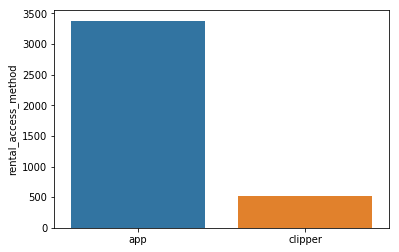

In [9]:
sb.barplot(rental_access.index, rental_access);

Of the **3893 records** that we have for rental_access_method, it seems most of the bookings came via the app. But since the number is less compared to the total records that we have, it might not be the right result.

In [10]:
#checking null
master_df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id              2905
start_station_name            2905
start_station_latitude           0
start_station_longitude          0
end_station_id                3007
end_station_name              3007
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
member_birth_year            68513
member_gender                68289
bike_share_for_all_trip       3893
rental_access_method       1240946
dtype: int64

The missing values of age and gender is a lot. Rental access method is a lot more missing. So we can drop the column.

In [11]:
# checking duplicates
master_df.duplicated().sum()

0

There are no duplicates! Nice!

## Data Cleaning

There seems to be a few quality issues with the data. The following are a few:
1. The start/end time should be in timestamp datatype. Birth year should be in integer
2. Bike_id, station_id need to be in string format.
3. Birth years might be wrong, since some users are more than 100 years of age.
4. The latitudes and longitudes are not readable by users. Need to calculate the distance travelled.
5. Delete the rental access method

In [12]:
# making a copy for cleaning

master_cleaned = master_df.copy()

**The start/end time should be in timestamp datatype.**

**Code:**

In [13]:
# changing datatype to datetime
master_cleaned.start_time = pd.to_datetime(master_cleaned.start_time)
master_cleaned.end_time = pd.to_datetime(master_cleaned.end_time)

In [14]:
#changing to string
master_cleaned.bike_id = master_cleaned.bike_id.astype(str)

In [15]:
# changing to string
master_cleaned.start_station_id = master_cleaned.start_station_id.astype(str)
master_cleaned.end_station_id = master_cleaned.end_station_id.astype(str)

**Test**

In [16]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
duration_sec               1244839 non-null int64
start_time                 1244839 non-null datetime64[ns]
end_time                   1244839 non-null datetime64[ns]
start_station_id           1244839 non-null object
start_station_name         1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
end_station_id             1244839 non-null object
end_station_name           1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
bike_id                    1244839 non-null object
user_type                  1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
bike_share_for_all_trip    1240946 non-null object
rental_access_method       3893 non-null object
dty

Required changes can be seen in the info.

In [17]:
master_cleaned.start_station_id.value_counts().head(20)

67.0    25821
58.0    24535
15.0    21248
81.0    20865
21.0    19328
3.0     18771
5.0     16863
30.0    16845
16.0    16541
6.0     15409
22.0    15380
50.0    12913
66.0    12310
27.0    11748
17.0    11657
44.0    11553
93.0    10891
90.0    10853
23.0    10230
61.0     9557
Name: start_station_id, dtype: int64

**Birth years might be wrong, since some users are more than 100 years of age.**

**Code:**

In [18]:
#calculate the age from the year of borth
master_cleaned['member_age'] = datetime.datetime.now().year - master_cleaned.member_birth_year

In [19]:
# check if most users are in range 18 to 70 years age

age_less_than_70 = len(master_cleaned.query('member_age < 70'))
age_less_than_70*100/1176326

99.61838809989747

**Test:**

In [20]:
master_cleaned[['member_birth_year', 'member_age']].head()

,member_birth_year,member_age
0,1989.0,30.0
1,1989.0,30.0
2,1965.0,54.0
3,1974.0,45.0
4,NaN,NaN


Text(0.5, 0, 'Age')

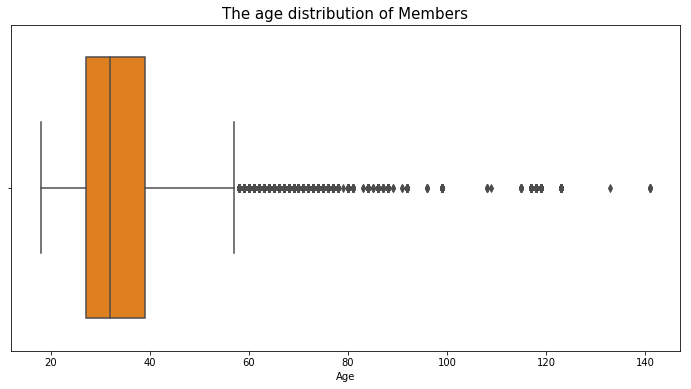

In [21]:
#plot he distribution of age
plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=master_cleaned, palette='autumn', orient='h')
plt.title("The age distribution of Members", fontsize=15)
plt.xlabel("Age")

Since most of the users are below the age of 70, we can forget the rest of the data.

In [22]:
# ignoring the age groups greater than 70 by marking None
master_cleaned[master_cleaned.member_age > 70] = None

**Test:**

Text(0.5, 0, 'Age')

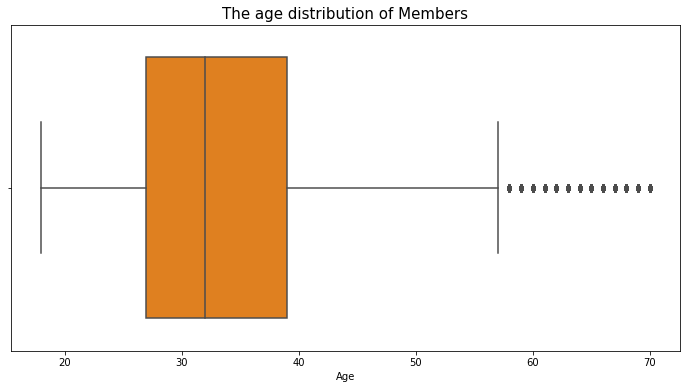

In [23]:
# plot corrected distribution

plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=master_cleaned, palette='autumn', orient='h')
plt.title("The age distribution of Members", fontsize=15)
plt.xlabel("Age")

**The latitudes and longitudes are not readable by users. Need to calculate the distance travelled.**

**Code:**<br>
Let us start by creating a function that gives the distance in kilometers

In [24]:
# function to calculate the distance from coordinates
def calculate_distance(latitude1, latitude2, longitude1, longitude2):
    # approximate radius of earth in km
    R = 6373.0
    
    try:
        lat1 = radians(latitude1)
        lon1 = radians(longitude1)
        lat2 = radians(latitude2)
        lon2 = radians(longitude2)
    #coversion to radians
    except:
        # if the coordinates are Null
        return None

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #difference in the coordinates 

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [25]:
# we call the function on each row of the dataset by passing the coordinates
master_cleaned['distance_travelled'] = master_cleaned.apply(lambda x: calculate_distance(x['start_station_latitude'],
                                                                                        x['end_station_latitude'],
                                                                                        x['start_station_longitude'],
                                                                                        x['end_station_longitude']),axis=1)

**Test:**

In [26]:
master_cleaned.describe()['distance_travelled']

count    1.241118e+06
mean     1.899664e+00
std      5.008328e+01
min      0.000000e+00
25%      9.238689e-01
50%      1.454068e+00
75%      2.246844e+00
max      1.280236e+04
Name: distance_travelled, dtype: float64

In [27]:
# rounding distance travelled to 3 decimals
master_cleaned = master_cleaned.round({'distance_travelled':3})
master_cleaned.describe().distance_travelled

count    1.241118e+06
mean     1.899658e+00
std      5.008328e+01
min      0.000000e+00
25%      9.240000e-01
50%      1.454000e+00
75%      2.247000e+00
max      1.280236e+04
Name: distance_travelled, dtype: float64

Now we can see that the distance was mostly less. The distance is calculated in kilometers

**Delete the rental access method**<br>

**Code:**

In [28]:
master_cleaned.drop('rental_access_method', axis=1, inplace=True)

**Test:**

In [29]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 18 columns):
duration_sec               1241118 non-null float64
start_time                 1241118 non-null datetime64[ns]
end_time                   1241118 non-null datetime64[ns]
start_station_id           1241118 non-null object
start_station_name         1238213 non-null object
start_station_latitude     1241118 non-null float64
start_station_longitude    1241118 non-null float64
end_station_id             1241118 non-null object
end_station_name           1238111 non-null object
end_station_latitude       1241118 non-null float64
end_station_longitude      1241118 non-null float64
bike_id                    1241118 non-null object
user_type                  1241118 non-null object
member_birth_year          1172605 non-null float64
member_gender              1172829 non-null object
bike_share_for_all_trip    1237225 non-null object
member_age                 1172605 non-null float

**Creating a separate column for month of the year**<br> This helps in the future analysis

In [52]:
# finding the month
master_cleaned['month'] = master_cleaned.start_time.dt.to_period('M')

**Calculating speed of the rides**

In [31]:
# speed = distance/time formulae
master_cleaned['speed'] = master_cleaned.distance_travelled / (master_cleaned.duration_sec/3600)
master_cleaned.describe().speed

count    1.241118e+06
mean     1.132278e+01
std      3.785368e+02
min      0.000000e+00
25%      8.137931e+00
50%      1.044000e+01
75%      1.271553e+01
max      2.632576e+05
Name: speed, dtype: float64

**Store dataframe in new csv**

In [32]:
master_cleaned.to_csv('baywheel_data_updated.csv', index=False)

### What is the structure of your dataset?

The dataset is a collection user rides data that provided the distance, time, station data with most of the data being clean. There are 191772 records dated for June 2019. This gives a very clear insight to the trends. Most values are numeric in the dataset.

The following are the features present:
1. Duration in seconds
2. Start time              
3. End_time                   
4. Start_station_id           
5. Start_station_name         
6. Start_station_latitude     
7. Start_station_longitude    
8. End_station_id             
9. End_station_name           
10. End_station_latitude       
11. End_station_longitude      
12. Bike_id                    
13. User_type                  
14. Member_birth_year          
15. Member_gender              
16. Bike_share_for_all_trip    
17. Member_age                 
18. Distance_travelled

### What is/are the main feature(s) of interest in your dataset?

Some of the interesting features to look out for are:
1. What age group is most prevalent in using the service.
2. What is the most popular station and the popular destination.
3. Does the distance travelled increase/decrease with age?
4. Is the Bike share for all program taking off well?
5. Is it the members or the casual customers that are using the service more

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Any data that is part of the distance, station, user related fields and time will help in getting the insights. We need to check where the footfall is more so that the company can be prepared for better services at those stations.
We need to check if any age group need more motivation to use the services. We speed, unique bike is will help in determining the speeds which users take a ride at.

## Univariate Exploration


In [33]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 19 columns):
duration_sec               1241118 non-null float64
start_time                 1241118 non-null datetime64[ns]
end_time                   1241118 non-null datetime64[ns]
start_station_id           1241118 non-null object
start_station_name         1238213 non-null object
start_station_latitude     1241118 non-null float64
start_station_longitude    1241118 non-null float64
end_station_id             1241118 non-null object
end_station_name           1238111 non-null object
end_station_latitude       1241118 non-null float64
end_station_longitude      1241118 non-null float64
bike_id                    1241118 non-null object
user_type                  1241118 non-null object
member_birth_year          1172605 non-null float64
member_gender              1172829 non-null object
bike_share_for_all_trip    1237225 non-null object
member_age                 1172605 non-null float

In [34]:
master_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,distance_travelled,speed
0,80825.0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No,30.0,5.307,0.236377
1,65900.0,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No,30.0,3.861,0.210920
2,62633.0,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No,54.0,3.288,0.188987
3,44680.0,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No,45.0,1.000,0.080573
4,60709.0,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No,NaN,0.954,0.056572


**Let's see if Baywheels Bike for all is a success**

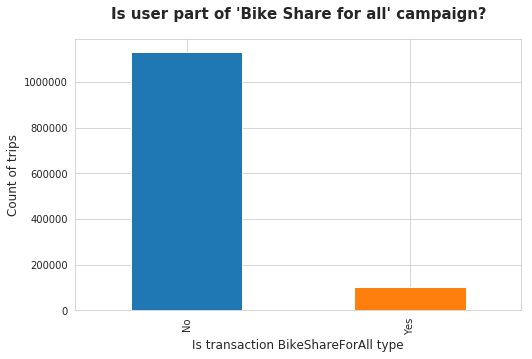

In [35]:
# Count of Yes/No for the campaign
program_count = master_cleaned.bike_share_for_all_trip.value_counts()

#set whitegrid for seaborn plots
sb.set_style('whitegrid')
# set figure size
plt.figure(figsize=(8,5))
# plot a bar chart
program_count.plot(kind='bar')
# set title
plt.title("Is user part of 'Bike Share for all' campaign?",fontsize=15,y=1.05, fontweight='bold');
#set the label on x axis
plt.xlabel("Is transaction BikeShareForAll type",fontsize=12)
#set the label on y axis
plt.ylabel("Count of trips",fontsize=12);

**How long do Bike trips generally last?**

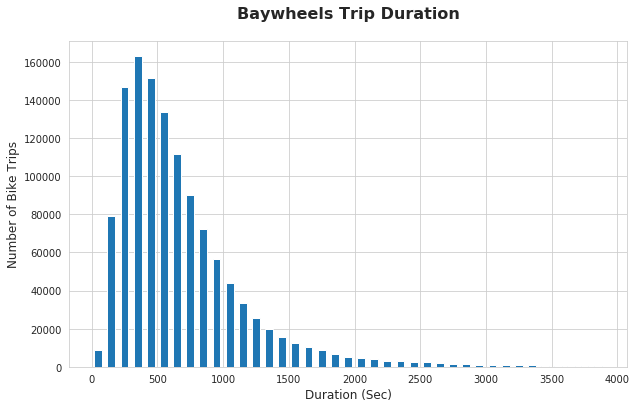

In [36]:
# Duration of the bike rides -in seconds
plt.figure(figsize=(10,6))

# create bins upto 4000 seconds, with 100 sec interval
bin_edges = np.arange(0, 4000, 100)
#plot a histogram
plt.hist(data = master_cleaned, x = 'duration_sec', bins = bin_edges, rwidth = 0.6);

#naming of plots
plt.title("Baywheels Trip Duration", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)',fontsize=12)
plt.ylabel('Number of Bike Trips',fontsize=12);

**Is it the males or the females who use the service more?**

In [37]:
gender_count = master_cleaned.member_gender.value_counts()
gender_count

Male      868535
Female    279319
Other      21979
M           2467
F            307
?            212
O             10
Name: member_gender, dtype: int64

We can notice that there are M, F being separate entities. We need to convert them to one.

**Code:**

In [38]:
# replace M,F,O
master_cleaned.loc[master_cleaned.member_gender == 'M','member_gender'] = 'Male'
master_cleaned.loc[master_cleaned.member_gender == 'F','member_gender'] = 'Female'
master_cleaned.loc[master_cleaned.member_gender == 'O','member_gender'] = 'Other'

#remove Null valued records of value counts
master_cleaned = master_cleaned[master_cleaned.member_gender.isin(['Male','Female','Other'])]

**Test**

In [39]:
gender_count = master_cleaned.member_gender.value_counts()
gender_count

Male      871002
Female    279626
Other      21989
Name: member_gender, dtype: int64

We can note that there are 871k Male users and 279k female users

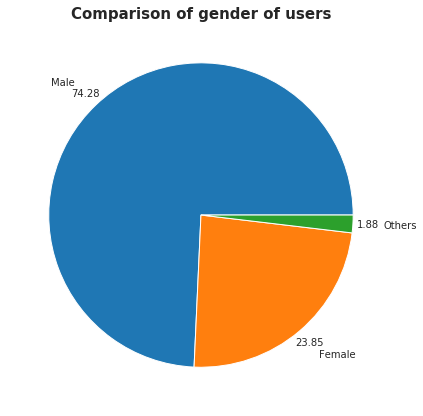

In [40]:
plt.figure(figsize=(7,7))
plt.pie(gender_count, labels = ['Male','Female','Others'], autopct = '%0.2f',labeldistance=1.2, pctdistance=1.1,);
plt.title("Comparison of gender of users", fontsize=15, fontweight='bold');

The users are dominated by Males with a whopping 74% users being male and female being 23.85%. This shows that there are a less number of females interested in the service or maybe females do not roam around a lot! 

**Distribution of rides by age groups**

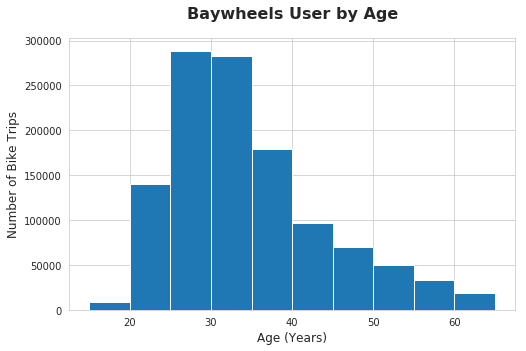

In [41]:
# Age group data
bin_edges = np.arange(15, 70, 5)
plt.figure(figsize=(8,5))
plt.hist(data = master_cleaned, x = 'member_age', bins = bin_edges);

plt.title("Baywheels User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)',fontsize=12)
plt.ylabel('Number of Bike Trips',fontsize=12);

**The people in the age group of 25 to 40 use the service a lot. This would mostly attribute the working professionals and student who might be staying nearby and use the ride sharing system for travel.**<br> There are close to 550K rides taken by users in the age group 25 to 35 that are using the service.

In [42]:
master_cleaned.distance_travelled.describe()

count    1.172617e+06
mean     1.910535e+00
std      5.152459e+01
min      0.000000e+00
25%      9.230000e-01
50%      1.452000e+00
75%      2.239000e+00
max      1.280236e+04
Name: distance_travelled, dtype: float64

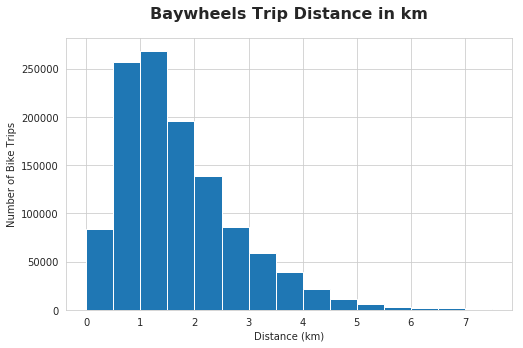

In [43]:
# Distance travelled in km
bin_edges = np.arange(0, 8, 0.5)
plt.figure(figsize=(8,5))
plt.hist(data = master_cleaned, x = 'distance_travelled', bins = bin_edges);

plt.title("Baywheels Trip Distance in km", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

**The ride sharing system is mostly supporting the short distance last-mile-connectivity. We can see that the distance is mostly less than 4 kilometers.**

In [44]:
#grouping data by hour and aggregating the count of each bike id
start_hour_df = master_cleaned.groupby(master_cleaned.start_time.dt.hour).agg({'bike_id':'count'}).reset_index()

In [45]:
#calculating to number of bikes
total_bikes = start_hour_df.bike_id.sum()

#calculating percentage of bikes running per hour
start_hour_df.bike_id = start_hour_df.bike_id*100/total_bikes
start_hour_df

,start_time,bike_id
0,0,0.548346
1,1,0.322441
2,2,0.205523
3,3,0.103103
4,4,0.140626
5,5,0.532314
6,6,2.040308
7,7,5.667153
8,8,11.147289
9,9,8.563069


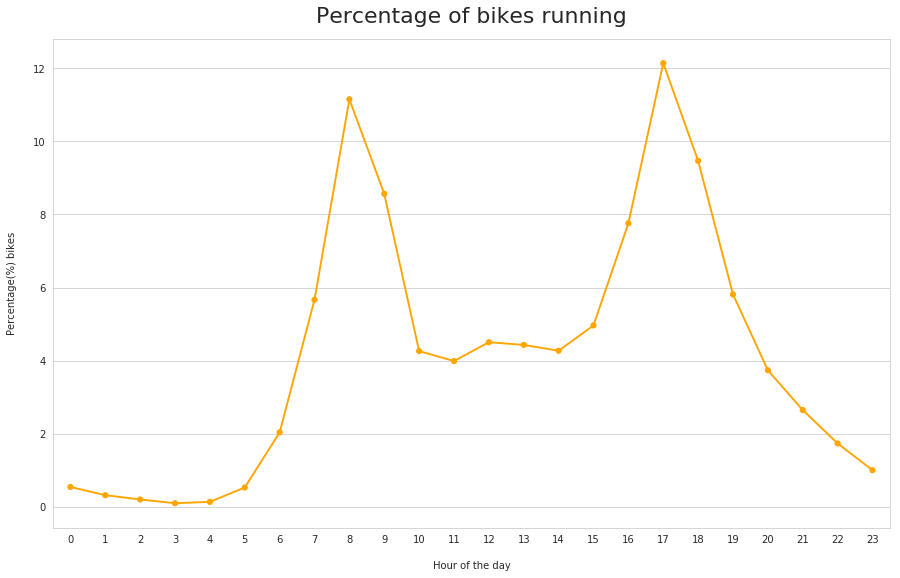

In [46]:
plt.figure(figsize=(15,9))
sb.pointplot(x='start_time', y='bike_id', scale=.7, color='orange', data=start_hour_df)
plt.title('Percentage of bikes running', fontsize=22, y=1.02)
plt.xlabel('Hour of the day', labelpad=16)
plt.ylabel('Percentage(%) bikes', labelpad=16);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Since the cleaning was done well before the exploratory analysis, there were no major changes that were needed. One change was that in the gender, there were 2 different notations found for each sex. Example, 'male' and 'M'. This was combined into one.
<br>
1. There is a a big gender gap. The males are using the service a lot more than the females. This could mean that the females do not like the service a lot or they do not travel a lot.
2. People in the age group 20 to 40 are mostly using the service. This attributes to student and working professionals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. The age of some of the users were a lot more than expected as was seen in the bar plot. These ages were not considered for the plots. 
2. A new field for the ages of the user and the distance travelled by each ride was created to help with the plots.
3. I calulated the number of bikes running at particular hour of the day. we can see that the ride service mostly used between 7Am to 10AM or 4PM to 8PM. This is the peak time when people go to work or to institutions of learning. 

## Bivariate Exploration


In [47]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
df_cleaned_user_week = master_cleaned.groupby([master_cleaned.start_time.dt.weekday, master_cleaned.user_type]).agg({'bike_id':'count'}).reset_index()
df_cleaned_user_week.rename(columns = {'O':'size'})
#x tick values
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned_user_week

,start_time,user_type,bike_id
0,0,Customer,16466
1,0,Subscriber,161698
2,1,Customer,17312
3,1,Subscriber,178895
4,2,Customer,17384
5,2,Subscriber,179836
6,3,Customer,19055
7,3,Subscriber,189519
8,4,Customer,20744
9,4,Subscriber,169200


/home/gautam/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


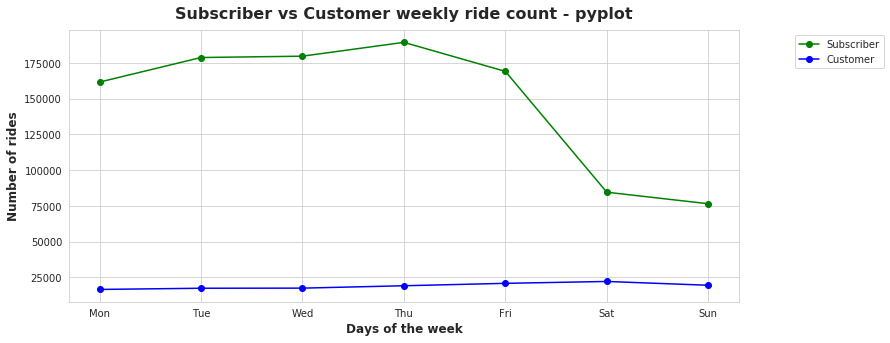

In [48]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
subscriber = df_cleaned_user_week.query("user_type == 'Subscriber'")
customer = df_cleaned_user_week.query("user_type == 'Customer'")

fig = plt.figure(figsize=(12, 5))
#create subplot for multiple point plots
ax1 = fig.add_subplot(111)

#plot of subscriber
ax1.plot(subscriber.start_time, subscriber.bike_id, label='Subscriber', color='green', marker='o')
#plot of customer
ax1.plot(customer.start_time, customer.bike_id, label='Customer', color='blue', marker='o')
plt.xticks([0,1,2,3,4,5,6],weekday)
plt.title("Subscriber vs Customer weekly ride count - pyplot", fontweight='bold', y =1.02, fontsize=16)
plt.xlabel('Days of the week',fontweight='bold', fontsize=12)
plt.ylabel('Number of rides',fontweight='bold', fontsize=12)

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))

ax1.grid('on');

**We do notice that the company has a good amount of subscriber when compared to guest customers.** This could mean good news for the company since there will be users who will use the service regularly. 

Now lets plot the same using Seaborn

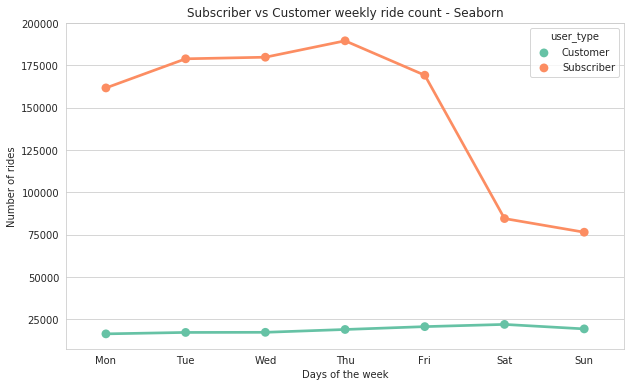

In [49]:
#Number of rides per day using seaborn
plt.figure(figsize=(10,6))
ax = sb.pointplot(x='start_time', y='bike_id', palette='Set2', hue='user_type', data=df_cleaned_user_week);
ax.set_title('Subscriber vs Customer weekly ride count - Seaborn')
ax.set(xlabel='Days of the week', ylabel='Number of rides');
plt.xticks([0,1,2,3,4,5,6],weekday);

/home/gautam/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


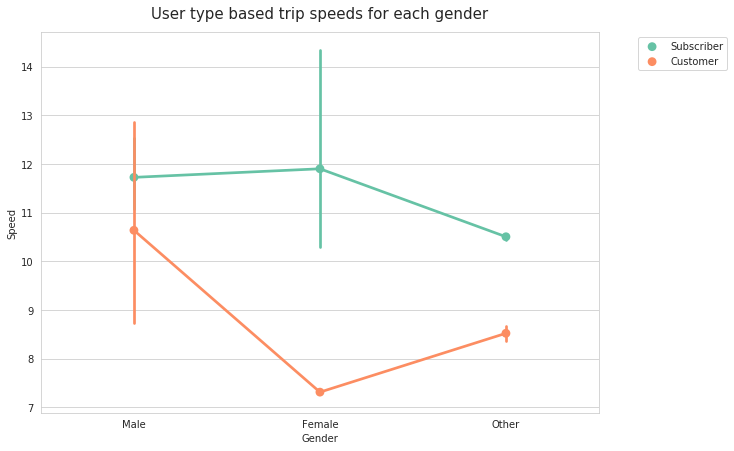

In [50]:
plt.figure(figsize=(10,7))
ax = sb.pointplot(x='member_gender', y='speed', palette='Set2', hue='user_type', data=master_cleaned);
ax.set_title('User type based trip speeds for each gender',fontsize=15, y=1.02)
ax.set(xlabel='Gender', ylabel='Speed')

#plotting the legend outside the graph
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))


The average male riding speeds among the subscribers seems to bit **slower** than the female users. This means females are faster in their rides than the males. The scenario changes when t comes to customers.

**Speed based on gender**

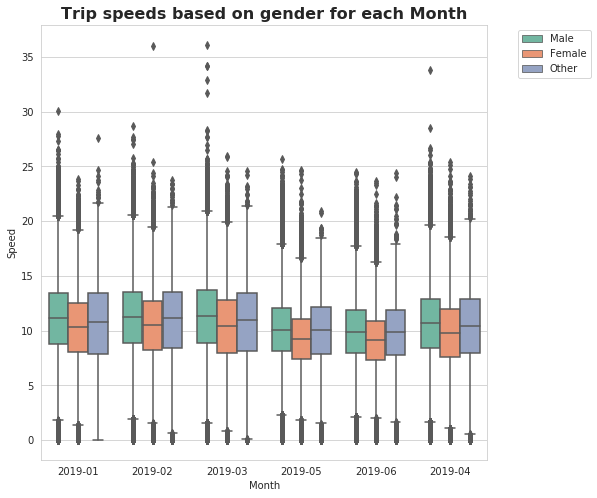

In [54]:
plt.figure(figsize=(8,8))
# boxplot
ax = sb.boxplot(x='month', y='speed', palette='Set2', hue='member_gender', data=master_cleaned.query('speed < 100'))
ax.set_title('Trip speeds based on gender for each Month', fontweight='bold', fontsize=16)
ax.set(xlabel='Month', ylabel='Speed')

#legend outside the chart
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))


1. The mean speed of Male users is bit highers than the other 2. 
2. We can also see that the overall speed of all the 3 genders has come down for the month of May and June. This could be the **Summer effect** where people slow down due to **tiredness from heat**.

In [55]:
monthly_user = master_cleaned.groupby(['month', 'user_type']).agg({'bike_id':'count'}).reset_index()
monthly_user

,month,user_type,bike_id
0,2019-01,Customer,17810
1,2019-01,Subscriber,163965
2,2019-02,Customer,16613
3,2019-02,Subscriber,157959
4,2019-03,Customer,30938
5,2019-03,Subscriber,212903
6,2019-04,Customer,29360
7,2019-04,Subscriber,197957
8,2019-05,Customer,19998
9,2019-05,Subscriber,153013


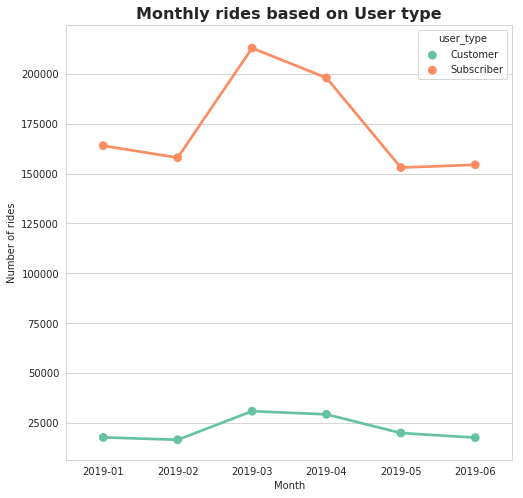

In [57]:
plt.figure(figsize=(8,8))
ax = sb.pointplot(x='month', y='bike_id', palette='Set2', hue='user_type', data=monthly_user)
ax.set_title('Monthly rides based on User type',fontweight='bold', fontsize=16)
ax.set(xlabel='Month', ylabel='Number of rides');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The average speed is more for that of Males than the females and others.
2. When compared month on month, there is a steep increase in the riderships in the Month on March 2019 for both subscribers and the customers. the falls a bit in April and falls again in May.
3. The average male riding speeds among the subscribers seems to bit slower than the female users. This means females are faster in their rides than the males. The scenario changes when t comes to customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I noticed the interesting trends of decrease in speeds with different seasons. With Spring, The speeds are good and when there is Summer, the speeds come down. This could be with the tiredness coming in with the heat.

## Multivariate Exploration


In [58]:
master_cleaned['duration_min'] = master_cleaned.duration_sec/60
master_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,distance_travelled,speed,month,duration_min
0,80825.0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,4861,Subscriber,1989.0,Male,No,30.0,5.307,0.236377,2019-01,1347.083333
1,65900.0,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,5506,Subscriber,1989.0,Male,No,30.0,3.861,0.210920,2019-01,1098.333333
2,62633.0,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,2717,Customer,1965.0,Female,No,54.0,3.288,0.188987,2019-01,1043.883333
3,44680.0,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,4557,Customer,1974.0,Male,No,45.0,1.000,0.080573,2019-01,744.666667
5,6733.0,2019-01-31 22:35:50.813,2019-02-01 00:28:04.512,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,...,3532,Subscriber,1994.0,Male,No,25.0,0.911,0.487093,2019-01,112.216667


/home/gautam/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


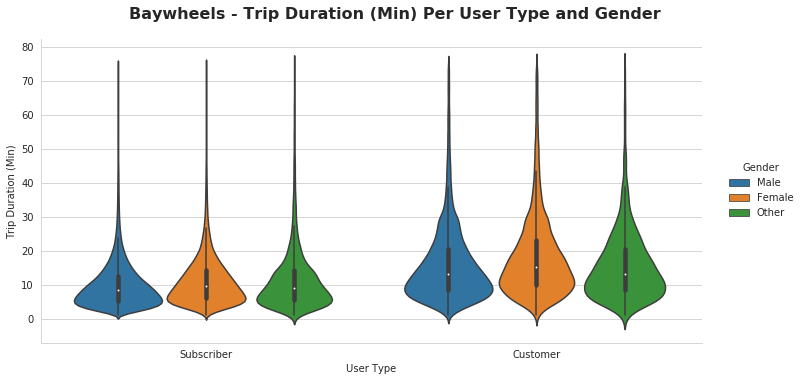

In [59]:
graph = sb.catplot(data=master_cleaned.query('duration_min < 75'), 
                   x='user_type', y='duration_min', hue="member_gender", 
                   kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Baywheels - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

The trip duration of customers looks to be greater than subscribers. This is mostly because guests customer use the service in the weekend for longer trips.

In [60]:
# group by the month and staion name and then count the unique bike_ids per station
station_details = master_cleaned.groupby(['month','start_station_name']).bike_id.count().reset_index()
station_details.head()

,month,start_station_name,bike_id
0,2019-01,10th Ave at E 15th St,65
1,2019-01,10th St at Fallon St,339
2,2019-01,10th St at University Ave,247
3,2019-01,11th St at Bryant St,883
4,2019-01,11th St at Natoma St,874


In [61]:
# sort the data in the descending order of number of bike rides per station
station_details = station_details.sort_values('bike_id', ascending=False).reset_index(drop=True)
station_details.head()

,month,start_station_name,bike_id
0,2019-03,Market St at 10th St,4969
1,2019-04,San Francisco Caltrain Station 2 (Townsend St...,4659
2,2019-03,San Francisco Caltrain Station 2 (Townsend St...,4582
3,2019-06,San Francisco Caltrain Station 2 (Townsend St...,4474
4,2019-04,Market St at 10th St,4285


In [62]:
# retrieve the top 6 stations of every month 
top_stations =station_details.groupby('month').head(6)
station_details

,month,start_station_name,bike_id
0,2019-03,Market St at 10th St,4969
1,2019-04,San Francisco Caltrain Station 2 (Townsend St...,4659
2,2019-03,San Francisco Caltrain Station 2 (Townsend St...,4582
3,2019-06,San Francisco Caltrain Station 2 (Townsend St...,4474
4,2019-04,Market St at 10th St,4285
5,2019-03,San Francisco Ferry Building (Harry Bridges Pl...,3929
6,2019-04,San Francisco Ferry Building (Harry Bridges Pl...,3900
7,2019-05,San Francisco Caltrain Station 2 (Townsend St...,3896
8,2019-03,Powell St BART Station (Market St at 4th St),3689
9,2019-01,Market St at 10th St,3657


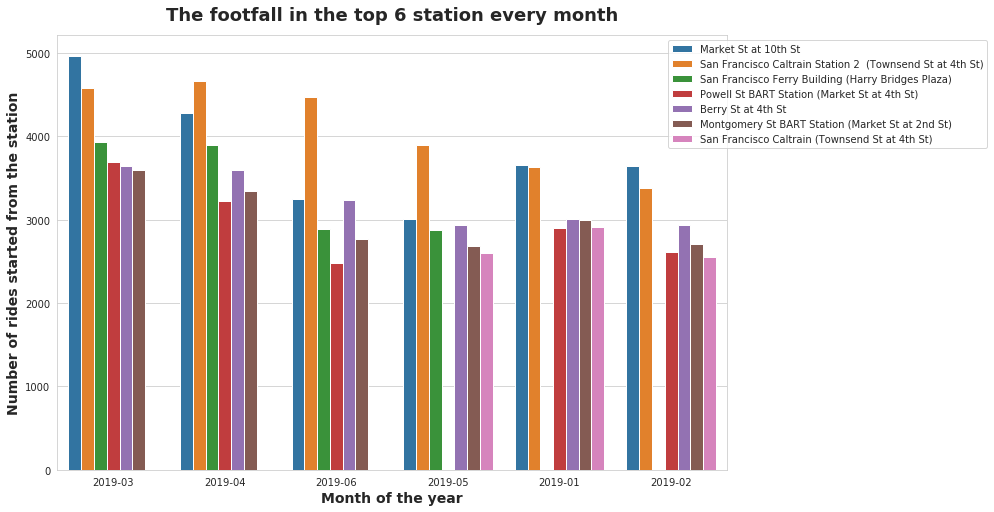

In [63]:
plt.figure(figsize=(12,8))
ax = sb.barplot(x='month',y='bike_id',data=top_stations, hue='start_station_name')

plt.title("The footfall in the top 6 station every month", fontsize=18, fontweight='bold', y=1.02)
plt.xlabel('Month of the year', fontweight='bold', fontsize=14)
plt.ylabel('Number of rides started from the station', fontweight='bold', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1));

In [64]:
# get only the month number
master_cleaned['only_month'] = master_cleaned.start_time.dt.month

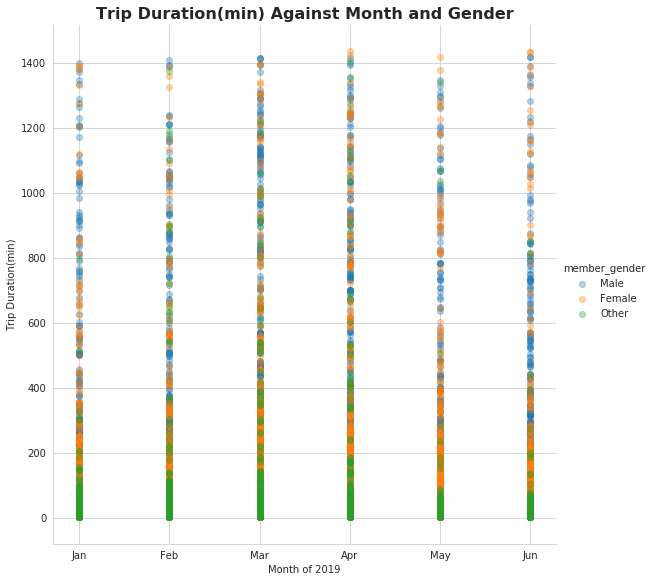

In [65]:
# Finding out how the average trip time is affected by gender and month.
g = sb.FacetGrid(data=master_cleaned, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'only_month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and Gender', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Month of 2019')
plt.xticks([1,2,3,4,5,6],['Jan','Feb','Mar','Apr','May','Jun'])
plt.ylabel('Trip Duration(min)');

I think there are equal number of people with the short duration. Thats why the color being green( mix of all 3 colors). We can see that most of the longer trips are made by Males. This can be realised by the greater number of blues in the upper region.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
1. With the catplot of the subscribers and customer, we can be sure that the customer make use of the bikes for a longer duration. this is mainly when the user during weekends goes for trips or exercise as well. 
2. The scatter plot shows that the Males have larger trip duration meaning better stamina. The females might not want to peddle longer distances.
3. San Francisco Caltrain station 2 seems to be a busy station for Lyft. There are good number of users hopping on at this staion. The company hence need to stay on its  toes for better service and more bikes here.

### Were there any interesting or surprising interactions between features?

1. Every month the top 5 stations are almost the same staions that come up. This could be because of the commertial status of the stations. 
2. Subscribers use only for their daily work routines and hence their distance travelled is relatively less. The customers on the other hand, use the service to roam around for maybe a trip, shopping, movies whoch might be at a farther distance. Hence there is larger distance travelled by them.

                                                                      - Gautam Gadiyar